In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Table of Content</h1>
<ul><b><h4>
<li>Part 1 : EDA & Visualization</li>
<li>Part 2.1 : Machine Leaning Model -- LogisticRegression Model</li>
<li>Part 2.2 : Machine Leaning Model -- DecisionTree Model</li>
<li>Part 2.3 : Machine Leaning Model -- DeepLearning Model</li>
<li>Part 3 : ClusterModel with KMeans Cluster</li>
<li>Part 4 : Conclusions</li><h4></b>
</ul>


## Part 1: EDA & Visualization

In [2]:
df=pd.read_csv("Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Shape

In [3]:
df.shape

(10000, 13)

#### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# No suggestions of null values

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Observation
* average credit is 650
* average age is 39. The minimum age is 18 and 92 at max.
* average tenure is 5 years.
* average balance is $76,485. The minimum balance is 0 and 250k at max.
* average number of products is 2.
* 75% of customers have credit cards.
* 51% of ccustomers are active members.
* average estimated salary 100k.
* 20% of the customers had left the firm.

#### Attrition Rate

In [7]:
a=df.Exited.mean()
print(f"{round(a*100,2)}% of customers had churned.")

20.37% of customers had churned.


In [8]:
df["Gender"]=df["Gender"].apply(lambda x:np.where(x=="Male",1,0))


In [9]:
df.Gender.value_counts().rename(index={1:"Male",0:"Female"})

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Visualization

In [10]:
round((df.Gender==1).mean()*100,2)

np.float64(54.57)

#### Observation
* 54.57% of customers are male

#### Null values

<Axes: >

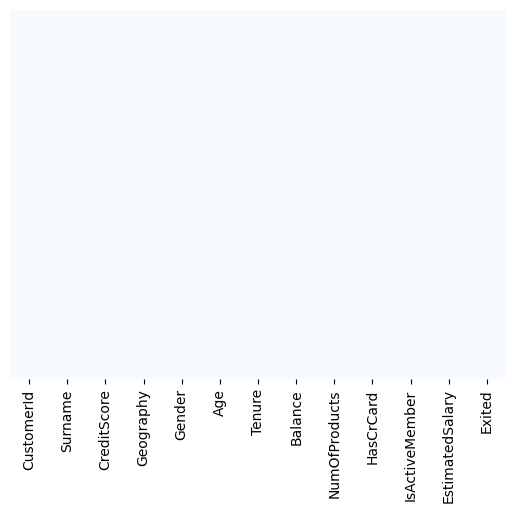

In [11]:
df.isnull().astype("int")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

Observation
* There is no null values.

<Figure size 500x500 with 0 Axes>

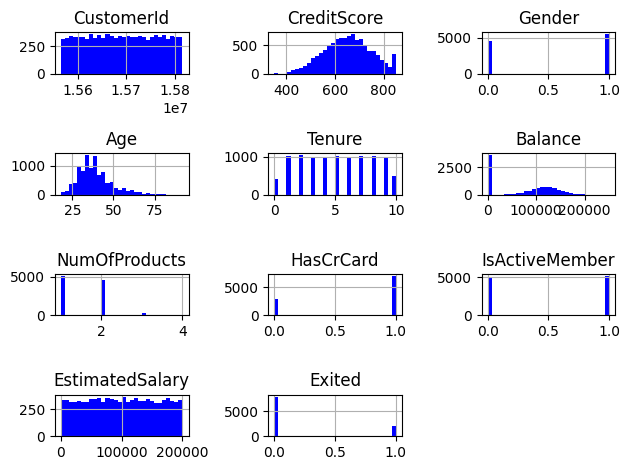

In [12]:
plt.figure(figsize=(5,5))
df.hist(bins=30,color="blue")
plt.title("Distribution on Features")
plt.tight_layout()
plt.show()

Observation
* CreditScore is normally distributed.
* Most of customers are by 50 years old.
* Most of customers have a tenure between 1 and 9 years.
* Most of clients' balance is at 0.
* most of clients have 1 and 2 products
* more customers have credit cards.
* active members are evenly distributed.
* estimated salaries are evenly distributed.
* More people choose to stay with the bank than people who choose to leave.

#### Attrtion Rate

In [13]:
df.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [14]:
print(f"Total customers ={df.shape[0]}")
print(f"stayed total ={df.query("Exited==0").shape[0]}")
print(f"left total ={df.query("Exited==1").shape[0]}")
print(f"% of stayed total ={round(df.query("Exited==0").shape[0]/df.shape[0]*100,2)}%")
print(f"% of left total ={round(df.query("Exited==1").shape[0]/df.shape[0]*100,2)}%")

Total customers =10000
stayed total =7963
left total =2037
% of stayed total =79.63%
% of left total =20.37%


#### Anatomay of Attritions

In [15]:
left_df=df.query("Exited==1")
stayed_df=df.query("Exited==0")

In [16]:
left_df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,0.440844,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,0.496610,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,0.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,0.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,1.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,1.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [17]:
stayed_df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,0.572523,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,0.494744,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,0.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,1.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,1.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,1.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [18]:
attrition_mean=df.drop("Geography",axis=1).groupby("Exited").mean()
attrition_mean.T.rename(columns={0:"Stayed",1:"Left"}).style.background_gradient(axis=1)

Exited,Stayed,Left
CreditScore,651.853196,645.351497
Gender,0.572523,0.440844
Age,37.408389,44.837997
Tenure,5.033279,4.932744
Balance,72745.296779,91108.539337
NumOfProducts,1.544267,1.475209
HasCrCard,0.707146,0.699067
IsActiveMember,0.554565,0.360825
EstimatedSalary,99738.391772,101465.677531


Observation:
* Customers who stayed tend to be more males; more females left.
* People who stayed are younger than those who left
* People who left have a higher balance than those who stayed
* More of people who stayed are a member; more of people who left are a non-member;
* People who left have a higher estimated salary than those who stayed.

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Among Features')

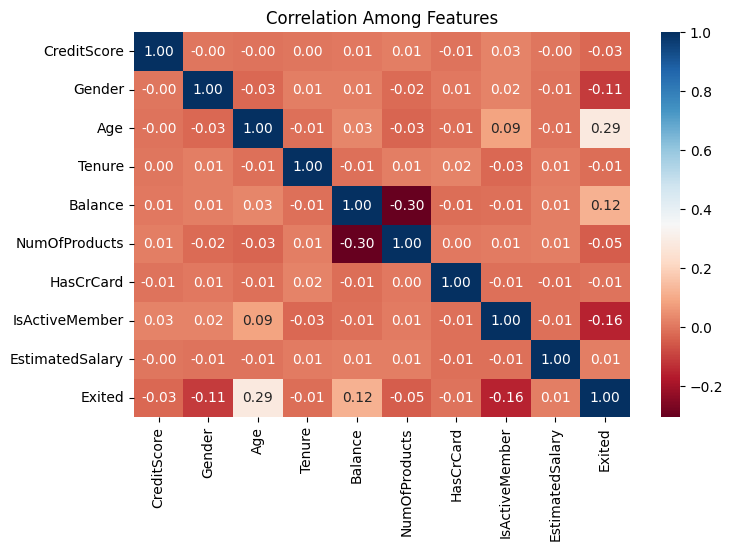

In [19]:
cor=df.drop("Geography",axis=1).corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(cor,annot=True,fmt="0.2f",cmap="RdBu")
plt.title("Correlation Among Features")

Observation
* There are not strong correlatioins among those features.
*  Age and Exited has a slightly high correlation.
*  Balance and Number of products have a negative correlation.
*  avtive membership has a low correlation against exited.

#### Age vs Attition

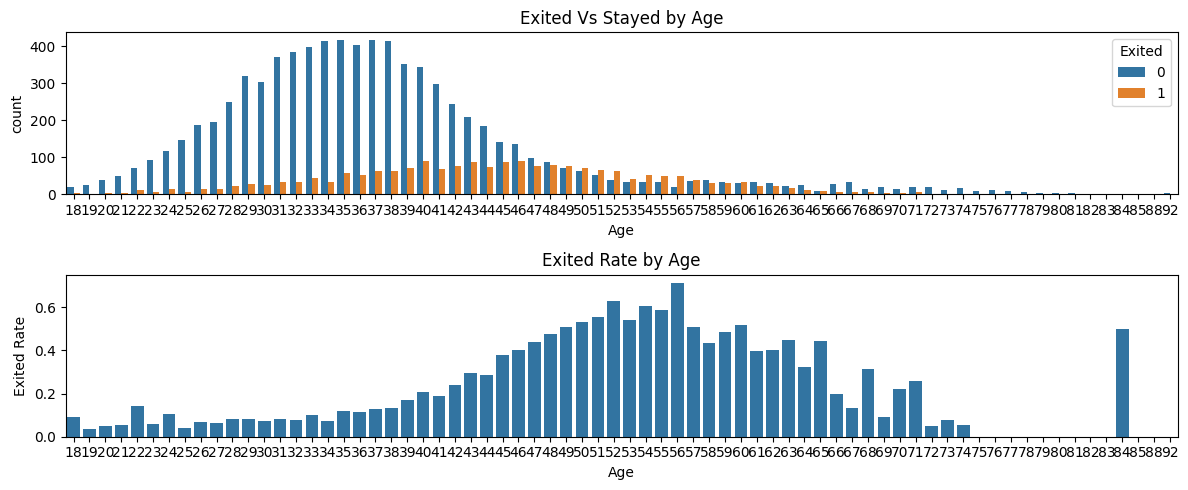

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(211)
sns.countplot(data=df,x="Age",hue="Exited")
plt.title("Exited Vs Stayed by Age")
plt.subplot(212)
a=df.groupby("Age").Exited.mean().reset_index()
sns.barplot(data=a,x="Age",y="Exited")
plt.ylabel("Exited Rate")
plt.xlabel("Age")
plt.title("Exited Rate by Age")
plt.tight_layout()
plt.show()

**Observation**
* Most of people who stayed are under 45.
* The highest exited rate are from 45 and 65 and at age of 84.
* Age 56 has the highest exited rate of 70%.

#### Exited vs Geograpgy

In [21]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

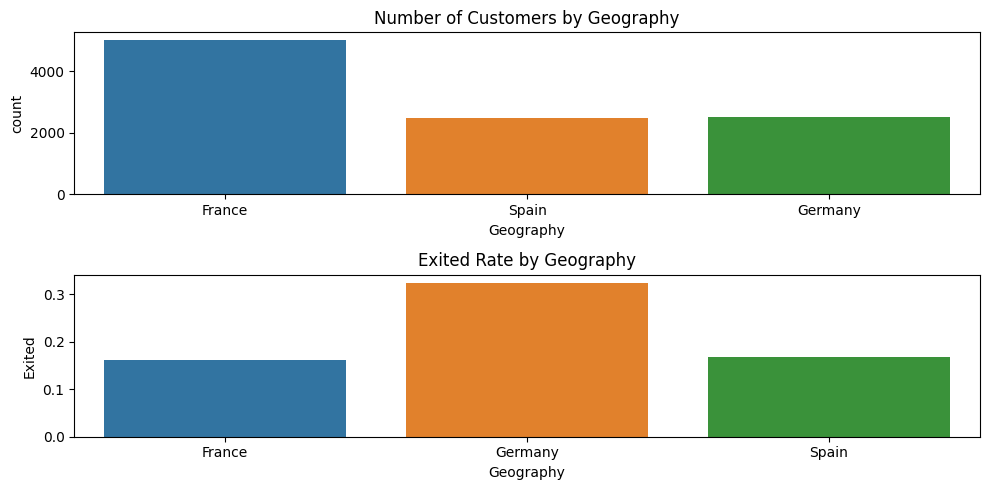

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.countplot(data=df,x="Geography",hue="Geography")
plt.title("Number of Customers by Geography")
plt.subplot(212)
a=df.groupby(["Geography"]).Exited.mean().reset_index()
sns.barplot(data=a,x="Geography",y="Exited",hue="Geography")
plt.title("Exited Rate by Geography")
plt.tight_layout()
plt.show()

**Observation**
* Customers from France are twice as many as customers in Spain and Germany respectively.
* Germany has an exited rate twice as high as that in France and Spain respectively.

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

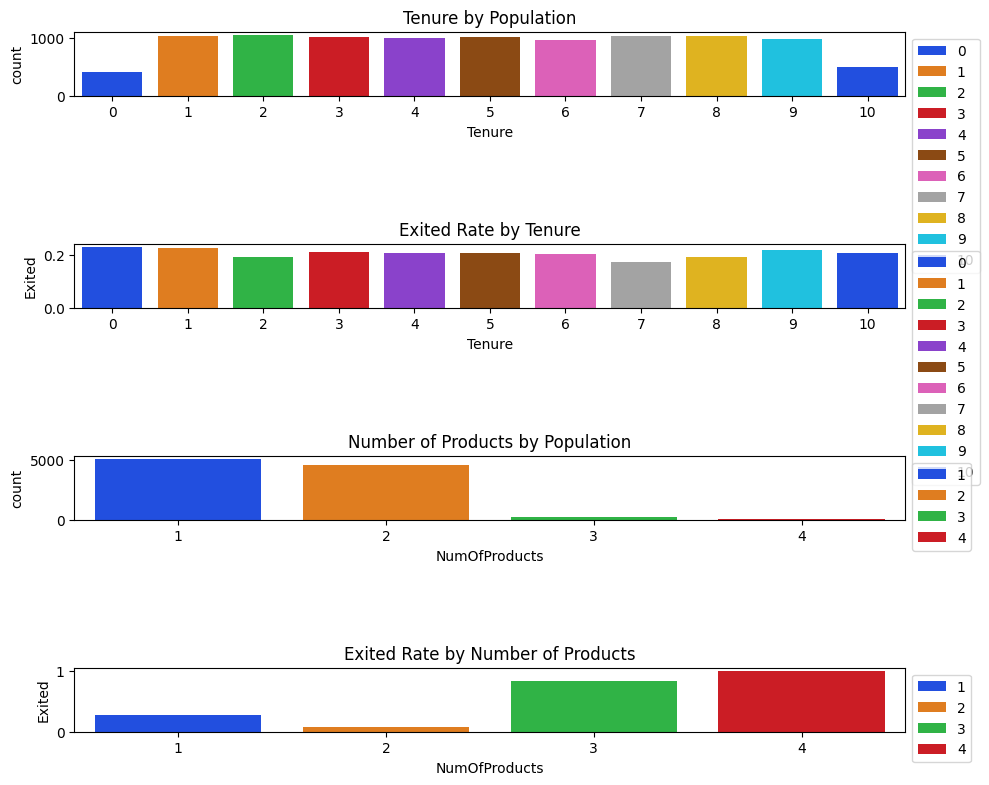

In [24]:
lst=["Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
plt.figure(figsize=(10,16))


plt.subplot(811)
sns.countplot(data=df,x="Tenure",hue="Tenure",palette="bright")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Tenure by Population")

plt.subplot(812)
sns.barplot(data=df.groupby("Tenure").Exited.mean().reset_index(),
            x="Tenure",y="Exited",hue="Tenure",palette="bright")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Exited Rate by Tenure")


plt.subplot(813)
sns.countplot(data=df,x="NumOfProducts",hue="NumOfProducts",palette="bright")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Number of Products by Population")

plt.subplot(814)
sns.barplot(data=df.groupby("NumOfProducts").Exited.mean().reset_index(),
            x="NumOfProducts",y="Exited",hue="NumOfProducts",palette="bright")
plt.title("Exited Rate by Number of Products")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

**Observation**
* Less customers have a tenure of less than 1 year and 10 years. The attrition rate for all tenures are similar.
* Majority of customers have 1 and 2 products; However, majority of customers with 3 and 4 products had left the banks.

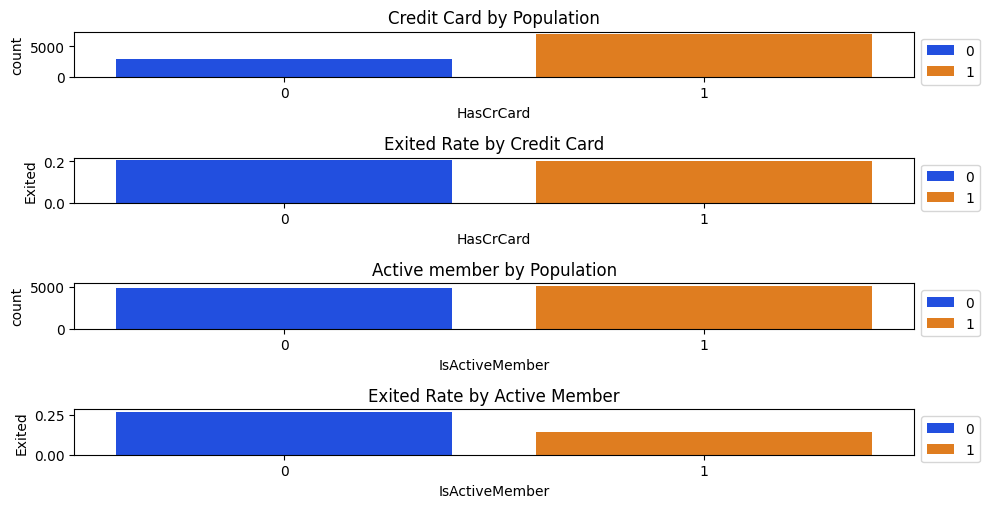

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(815)
sns.countplot(data=df,x="HasCrCard",hue="HasCrCard",palette="bright")
plt.title("Credit Card by Population")
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(816)
sns.barplot(data=df.groupby("HasCrCard").Exited.mean().reset_index(),
            x="HasCrCard",y="Exited",hue="HasCrCard",palette="bright")
plt.title("Exited Rate by Credit Card")
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(817)
sns.countplot(data=df,x="IsActiveMember",hue="IsActiveMember",palette="bright")
plt.title("Active member by Population")
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(818)
sns.barplot(data=df.groupby("IsActiveMember").Exited.mean().reset_index(),
            x="IsActiveMember",y="Exited",hue="IsActiveMember",palette="bright")
plt.title("Exited Rate by Active Member")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Observation**
* More customers have credit cards; however, the attrition rate for both group are even.
* Memberships are even; however, more people without membership had left.

In [26]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#### kde for Credit

**Observation**
* For clients who stayed and left, they have similar credit scores.

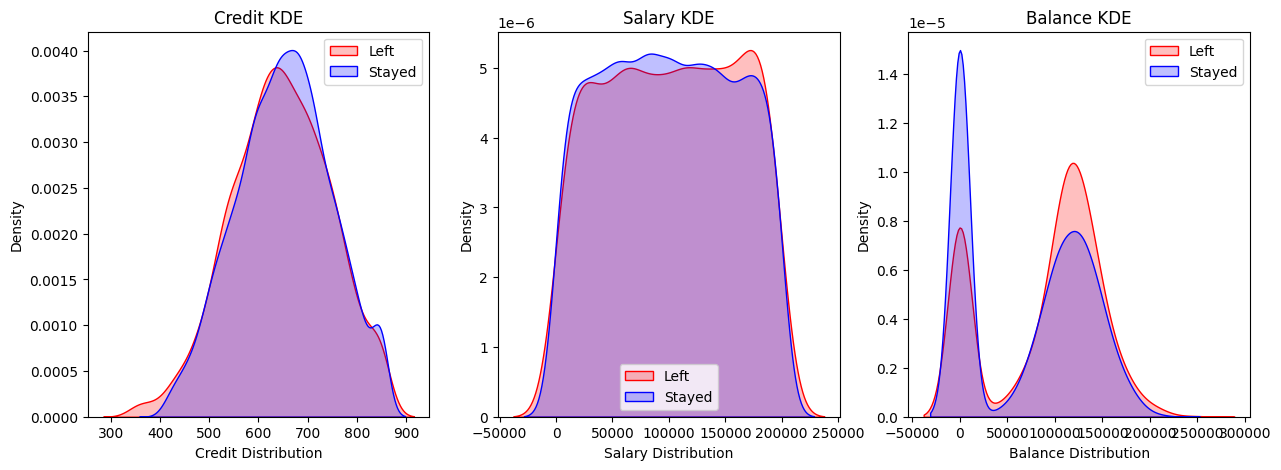

In [27]:
lst=["CreditScore","EstimatedSalary","Balance"]

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.kdeplot(data=df.query("Exited==1"),x="CreditScore",label="Left",color="r",fill=True)
sns.kdeplot(data=df.query("Exited==0"),x="CreditScore",label="Stayed",color="b",fill=True)
plt.xlabel("Credit Distribution")
plt.title("Credit KDE")
plt.legend()

plt.subplot(132)
sns.kdeplot(data=df.query("Exited==1"),x="EstimatedSalary",label="Left",color="r",fill=True)
sns.kdeplot(data=df.query("Exited==0"),x="EstimatedSalary",label="Stayed",color="b",fill=True)
plt.xlabel("Salary Distribution")
plt.title("Salary KDE")
plt.legend()

plt.subplot(133)
sns.kdeplot(data=df.query("Exited==1"),x="Balance",label="Left",color="r",fill=True)
sns.kdeplot(data=df.query("Exited==0"),x="Balance",label="Stayed",color="b",fill=True)
plt.xlabel("Balance Distribution")
plt.title("Balance KDE")
plt.legend()

**Observation**
* For clients who stayed and left, they have similar credit scores.
* For clients who stayed and left, they have similar estimated Salary.
* More people who stayed have less than 20K.

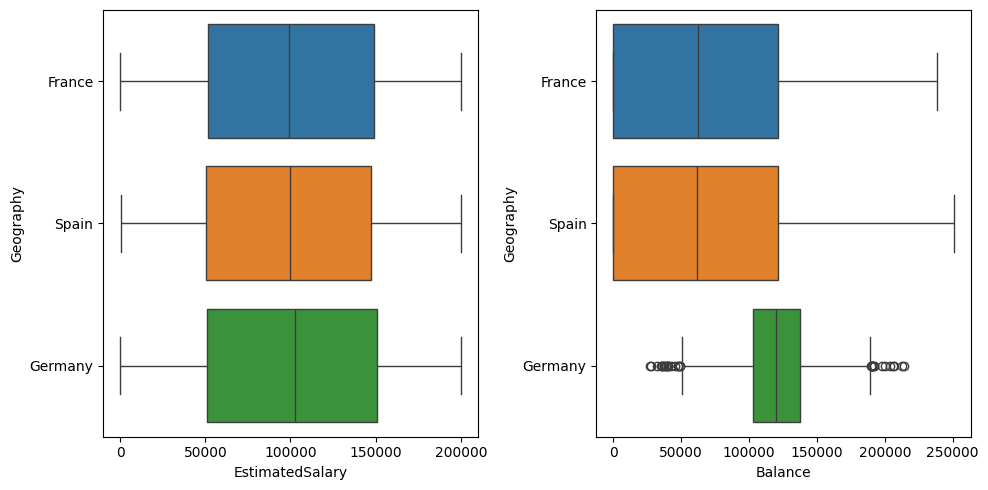

In [28]:
## Salary, balance vs Gender, Geography, 
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(data=df,x="EstimatedSalary",y="Geography",hue="Geography")
plt.subplot(122)
sns.boxplot(data=df,x="Balance",y="Geography",hue="Geography")
plt.tight_layout()
plt.show()

Observation
* All the country have the same salary distribution.
* Clients in Germany have higher balances.

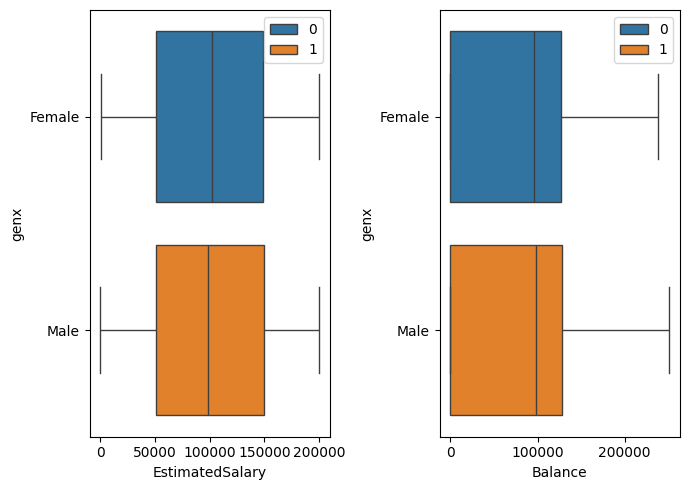

In [29]:
df["genx"]=df.Gender.apply(lambda x:"Male" if x==1 else "Female")
plt.figure(figsize=(7,5))
plt.subplot(121)
sns.boxplot(data=df,x="EstimatedSalary",y="genx",hue="Gender")
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(122)
sns.boxplot(data=df,x="Balance",y="genx",hue="Gender")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

Observation
* Both make and female have very similar salary and balances.

## Part 2.1 : Machine Learning Model - LogisticRegression

In [30]:
df.drop("genx",axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


#### Convert categorical feature to numerical feature

In [31]:
geo=pd.get_dummies(df.Geography,drop_first=True).astype("int")

In [32]:
data=pd.concat([df.drop("Geography",axis=1),geo],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [33]:
X=data.drop("Exited",axis=1)
y=data.Exited

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log=LogisticRegression(max_iter=5000,solver="saga",class_weight="balanced")
params={
    "C":np.linspace(0.1,2,20),
    "penalty":["l1","l2"]
}
grid=GridSearchCV(log,params)
grid.fit(X_train_std,y_train)


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'penalty': ['l1', 'l2']})

In [37]:
best_params=grid.best_params_
best_params

{'C': np.float64(0.1), 'penalty': 'l1'}

#### The best parameters are C=0.1, penalty is l1

In [38]:
log_model=LogisticRegression(**best_params,max_iter=5000,solver="saga",class_weight="balanced")
log_model.fit(X_train_std,y_train)

LogisticRegression(C=np.float64(0.1), class_weight='balanced', max_iter=5000,
                   penalty='l1', solver='saga')

#### Model Evaluation

In [39]:
y_train_pred=log_model.predict(X_train)
y_test_pred=log_model.predict(X_test)


C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [40]:
def classification_metrics(X,y,model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
    y_pred=model.predict(X)
    score=accuracy_score(y,y_pred)
    precision=precision_score(y,y_pred)
    recall=recall_score(y,y_pred)
    f1=f1_score(y,y_pred)
    print(f"The accuracy score is {score}, the precision score is {precision}; the recall score is {recall}; f1_score is {f1}")
    report=classification_report(y,y_pred)
    print(report)
    cm=confusion_matrix(y,y_pred)
    print(f"Confusion Matrix is \n {cm}")
    plt.figure(figsize=(8,5))
    plt.subplot(221)
    sns.heatmap(cm,annot=True,fmt="g",cmap="RdBu",cbar=False)
    plt.title("Heatmap for Confusion Matrix")
   
    
    p_curve,r_curve, t_curve=precision_recall_curve(y,model.predict_proba(X)[:,1])
    plt.subplot(222)
    plt.plot(t_curve, p_curve[:-1],label="Precision")
    plt.plot(t_curve, r_curve[:-1],label="Recall")
    plt.xlabel("Prediction Threshold")
    plt.ylabel("Scores")
    plt.legend()
    plt.title("Precision-Recall-Curve")
   
    # f1-curve
    y_probs=model.predict_proba(X)[:,1]
    thresholds=np.linspace(0,1,100)    
    f1_scores=[f1_score(y,(y_probs>=threshold)) for threshold in thresholds]
    plt.subplot(223)
    plt.plot(thresholds,f1_scores)
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score")
    
    # ROC Curve
    fpr,tpr,thresholds=roc_curve(y,y_probs)
    auc_score=auc(fpr,tpr)
    plt.subplot(224)
    plt.plot([0,1],[0,1],"k--",label="Random Guess (AUC=0.5)")
    plt.plot(fpr,tpr, label=f"AUC={auc_score:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC Curves for Different Models")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [41]:
print(f"The training accuracy is {log_model.score(X_train_std,y_train)}")
print(f"The testinging accuracy is {log_model.score(X_test_std,y_test)}")

The training accuracy is 0.708875
The testinging accuracy is 0.72


The accuracy score is 0.72, the precision score is 0.38545953360768176; the recall score is 0.7150127226463104; f1_score is 0.5008912655971479
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

Confusion Matrix is 
 [[1159  448]
 [ 112  281]]


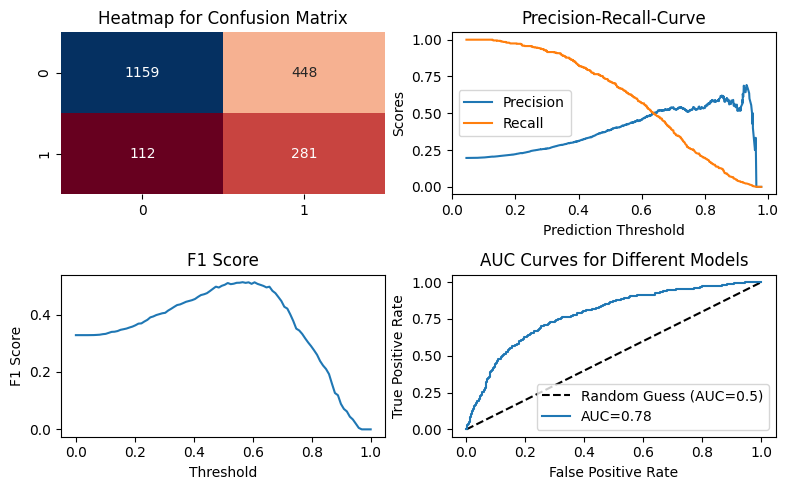

In [42]:
classification_metrics(X_test_std,y_test,log_model)

**Observation**
* Both training and testing accuracy scores are 70% and 72%, which means there is no overfitting but a minor underfitting.
* **Training** f1 score is 81%, but testing f1 score is only 50%. It means the model is good at predicting negative cases but bad at predicting positive cases.
* **Precision-Recall** Curve: There are some trade-off between precision and recall is high. 100% of precision came with 20% of recall. The maximum recall of 70% comes with 0% precision.
* The **highest f1_score** is 53% at threshold of 30%. The f1 is low at max.
* **AUC Curve**: AUC is 78%. The model is better than random guess.
* **In colusion**, this model should not be used for predicting positive case, but it's suitable for predicting negative cases.

## Part 2.2 : Machine Learning Model - DecisionTree Model

#### Convert categorical feature to numerical feature without dropping the fist category since RandomForestModel is **not affected by multicolinearity**.

In [43]:
geo1=pd.get_dummies(df.Geography).astype("int")
data_random=pd.concat([df.drop("Geography",axis=1),geo1],axis=1)
data_random.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [44]:
X=data_random.drop("Exited",axis=1)
y=data_random.Exited
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# No scaling is necessary
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"],
    
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [45]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': np.int64(15)}

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=np.int64(15))

In [47]:
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}")
print("The model is overfit")

The training accuracy is 0.8105. The testing accuracy is 0.759
The model is overfit


#### Important Features

<Axes: xlabel='Scores', ylabel='Features'>

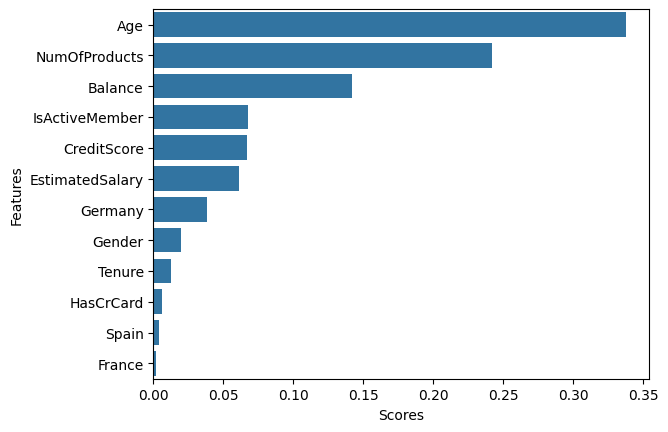

In [48]:
df_importance=pd.DataFrame({"Features":X.columns,"Scores":dt.feature_importances_})
sns.barplot(df_importance.sort_values("Scores",ascending=False),x="Scores",y="Features")

In [49]:
feature_df=X[["Age","NumOfProducts","Balance", "IsActiveMember","CreditScore","EstimatedSalary"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature_df,y,test_size=0.2,random_state=42)
# No scaling is necessary
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"],
    
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [50]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': np.int64(10)}

The training accuracy is 0.771625. The testing accuracy is 0.7655. There is no overfitting
------------------------
The accuracy score is 0.7655, the precision score is 0.4418960244648318; the recall score is 0.7353689567430025; f1_score is 0.5520534861509073
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1607
           1       0.44      0.74      0.55       393

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.77      0.78      2000

Confusion Matrix is 
 [[1242  365]
 [ 104  289]]


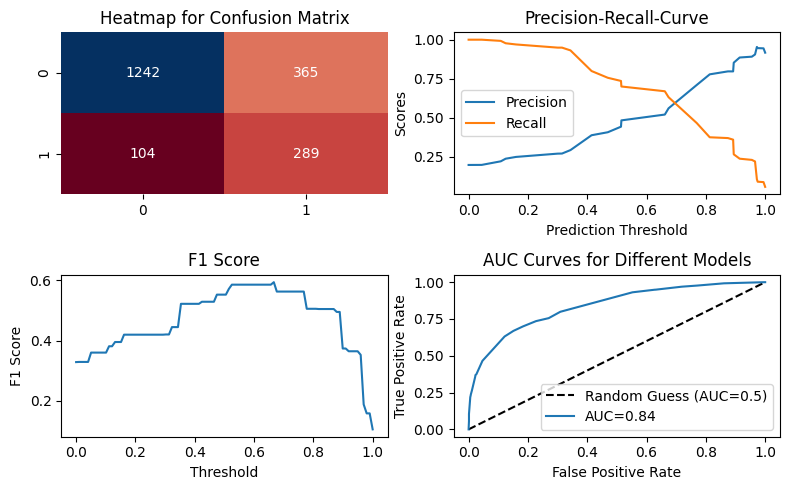

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}. There is no overfitting")
print("------------------------")
classification_metrics(X_test,y_test,dt)

Observation 
* The training accuracy is 74.4%, and the testing accuracy is 74%. There is no overfitting.
* The f1 for positive case is 82% and the negative case is 55%. The model is better at predicting negative cases than positive cases.
* Precision-Recall-Curve: There is a trade off between precision and recall. When recall is 100%, precision is at 25%; however, 100% of precision is changed for 0% of recall at 100% of threshold.
* f1 score at the max is60%  when threshold is also at 60%.
* AUC is 85%. The model prediction is better than a random guess.

## Part 2.3 : Machine Learning Model - Deep Learning Model

In [52]:
# Convert Categorical features to numerical features
geo1=pd.get_dummies(df.Geography).astype("int")
data_random=pd.concat([df.drop("Geography",axis=1),geo1],axis=1)
data_random.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1


In [53]:
X=data_random.drop("Exited",axis=1)
y=data_random.Exited

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [56]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation="relu",input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [59]:
epoch_hist=model.fit(X_train_std,y_train,epochs=50, batch_size=50)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7272 - loss: 0.5731
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.4550
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4374
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.4107
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.3866
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8467 - loss: 0.3697
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3634
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3441
Epoch 9/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3297
Epoch 10/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3384
Epoch 11/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8553 - loss: 0.3468
Epoch 12/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [60]:
y_train_pred=model.predict(X_train_std)
y_train_pred=(y_train_pred>0.5).astype("int")
y_pred=model.predict(X_test_std)
y_pred=(y_pred>0.5).astype("int")

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Deep Learning Model Evaluation

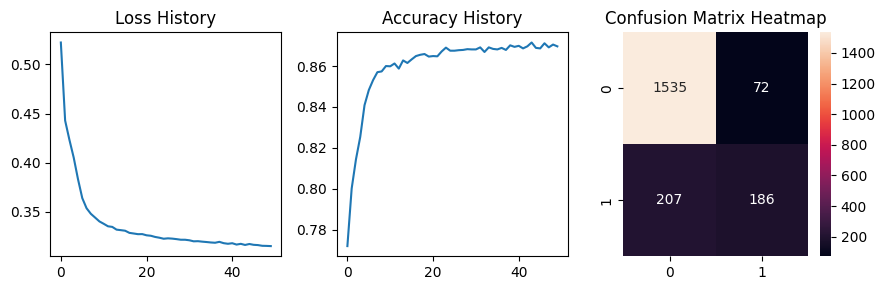

In [61]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(epoch_hist.history["loss"])
plt.title("Loss History")
plt.subplot(132)
plt.plot(epoch_hist.history["accuracy"])
plt.title("Accuracy History")
plt.subplot(133)
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import accuracy_score as score
print(f"The training accuracy score is {score(y_train,y_train_pred)}")
print(f"The testing accuracy score is {score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

The training accuracy score is 0.870375
The testing accuracy score is 0.8605
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Observations**
* **f1** for negative cases is 0.92; however, f1 for positive cases is 0.58. It means the model is good at predicting negative cases but bad at positive cases.
* Accuracy score is 87% for training dataset, and 86% for testing dataset. There is no overfitting and under fitting. Both of them have high accuracy.
* According to accuracy history, high accuracy had achived at the first epoch. If epoch goes beyond 50, the model would be overfitting 

## Conclusion for Part 2 Machine Learning Models

* The deep learning model has the highest accuray, f 1 score for both positive and negative cases.
* However, for LogisticRegression and DecisionTree models, the recall is higher than the precision for positive case. For deep learning, the precision is higher than the recall for the positive cases.

## Part 3 Clustering Model with KMeans Clusters

#### KMeans Cluster Round-1

In [63]:
cluster_df=data_random.drop("Exited",axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaler=pd.DataFrame(scaler.fit_transform(cluster_df),columns=cluster_df.columns)


#### Fit model with 2 to 14 clusters and record the inertia and silhouette scores

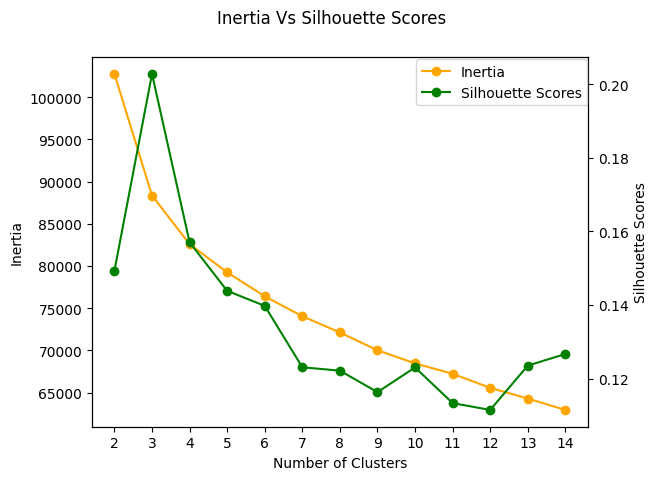

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
lst_inertia=[]
sil_scores=[]
for n in range(2,15):
    kmeans=KMeans(n_clusters=n,n_init=10,random_state=42)
    kmeans.fit(df_scaler)
    lst_inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaler,kmeans.labels_,metric="euclidean",sample_size=None))

fig,ax=plt.subplots()
ax.plot(
    range(2,15),
    lst_inertia,
    label="Inertia",
    c="orange",
    marker="o"
)

ax.set_ylabel("Inertia")
ax.set_xlabel("Number of Clusters")
ax2=ax.twinx()
ax2.plot(
    range(2,15),
    sil_scores,
    label="Silhouette Scores",
    c="green",marker="o"
)
ax2.set_ylabel("Silhouette Scores")
plt.xticks(range(2,15))
fig.suptitle("Inertia Vs Silhouette Scores")
fig.legend(bbox_to_anchor=(0.91,0.89))

Observation
* When the number of clusters are 3 and 4, the silhouette scores are the highest.

#### Set n_cluster=3

In [66]:
kmeans3=KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans3.fit(df_scaler)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [67]:
from collections import Counter
Counter(kmeans3.labels_)

Counter({np.int32(1): 5014, np.int32(2): 2509, np.int32(0): 2477})

Text(0.5, 1.0, '3 Clusters Heatmap')

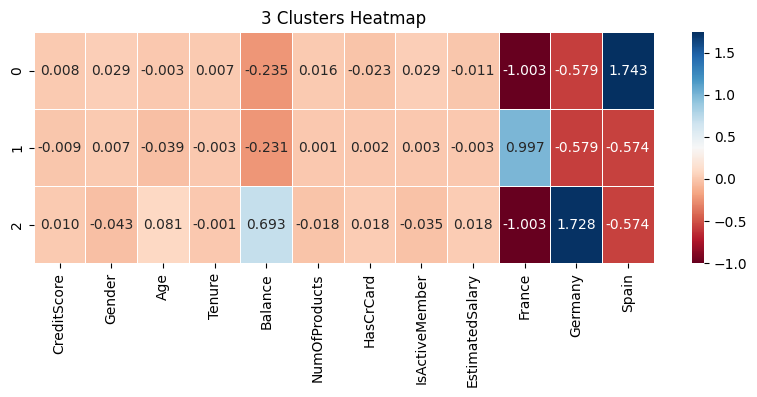

In [68]:
cluster_centers3=pd.DataFrame(kmeans3.cluster_centers_,columns=df_scaler.columns)
cluster_centers3
plt.figure(figsize=(10,3))
sns.heatmap(cluster_centers3,annot=True,cmap="RdBu",fmt="0.3f",linewidth=0.5)
plt.title("3 Clusters Heatmap")

Interpret the clusters:
* Cluster 0: low balance, from Spain;
* Cluster 1: low balance, from France;
* Cluster 2: high balance, From Germany.

## PCA Visualization

In [69]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_scaler)

PCA(n_components=2)

In [70]:
pca.explained_variance_ratio_.sum()

np.float64(0.2808483555235916)

In [71]:
comp_df=pd.DataFrame(pca.components_,columns=df_scaler.columns)
comp_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,0.010666,-0.011870,0.080644,-0.008512,0.489983,-0.181793,-0.006192,-0.014357,0.012638,-0.594009,0.599500,0.085947
1,0.016238,0.017871,-0.013503,0.019416,-0.313445,0.207922,-0.016717,0.041406,-0.014296,-0.455806,-0.239256,0.768230


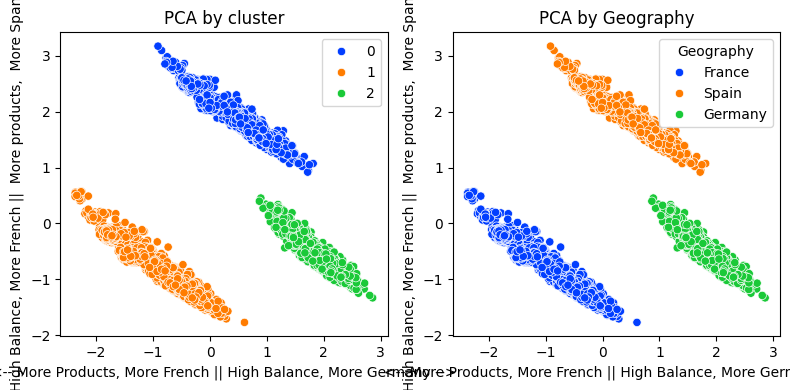

In [72]:
pca_df=pd.DataFrame(pca.transform(df_scaler),columns=["PC1","PC2"])
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.scatterplot(x="PC1",y="PC2",data=pca_df,hue=kmeans3.labels_,palette="bright")
plt.xlabel("<-- More Products, More French || High Balance, More Germany -->")
plt.ylabel("<-- High Balance, More French ||  More products,  More Spanish -->")
plt.title("PCA by cluster")
plt.subplot(122)
sns.scatterplot(x="PC1",y="PC2",data=pca_df,hue=df.Geography,palette="bright")
plt.xlabel("<-- More Products, More French || High Balance, More Germany -->")
plt.ylabel("<-- High Balance, More French ||  More products,  More Spanish -->")
plt.title("PCA by Geography")
plt.tight_layout()
plt.show()

Observation:
* It's clustered by geography feature.

## Cluster Without Geography -- Round 2

In [73]:
data_round2=df_scaler.drop(["France","Germany","Spain"],axis=1)
data_round2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


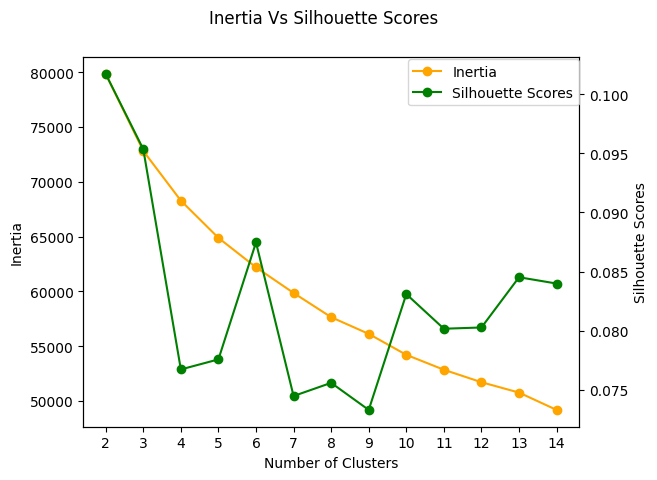

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
lst_inertia=[]
sil_scores=[]
for n in range(2,15):
    kmeans=KMeans(n_clusters=n,n_init=10,random_state=42)
    kmeans.fit(data_round2)
    lst_inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaler,kmeans.labels_,metric="euclidean",sample_size=None))

fig,ax=plt.subplots()
ax.plot(
    range(2,15),
    lst_inertia,
    label="Inertia",
    c="orange",
    marker="o"
)

ax.set_ylabel("Inertia")
ax.set_xlabel("Number of Clusters")
ax2=ax.twinx()
ax2.plot(
    range(2,15),
    sil_scores,
    label="Silhouette Scores",
    c="green",marker="o"
)
ax2.set_ylabel("Silhouette Scores")
plt.xticks(range(2,15))
fig.suptitle("Inertia Vs Silhouette Scores")
fig.legend(bbox_to_anchor=(0.91,0.89))

Observation
* Two, three, and six clusters give the highest silhouette scores.

## n_cluster=2

In [75]:
kmeans2=KMeans(n_clusters=2,n_init=10,random_state=42)
kmeans2.fit(data_round2)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [76]:
from collections import Counter
Counter(kmeans2.labels_)

Counter({np.int32(0): 5767, np.int32(1): 4233})

Text(0.5, 1.0, '2 Clusters Centers Heatmap')

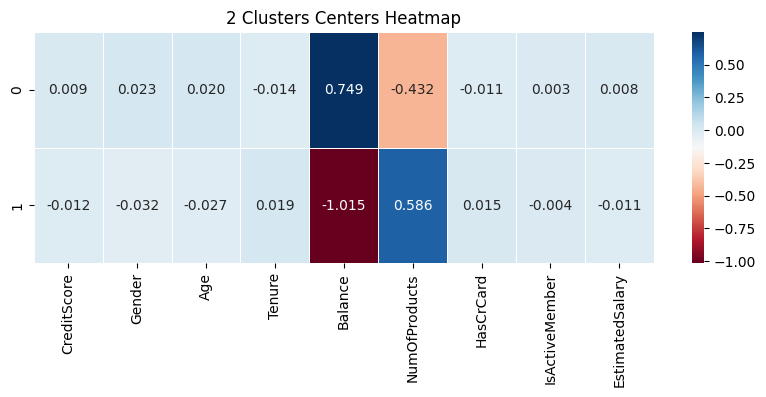

In [77]:
cluster_centers2=pd.DataFrame(kmeans2.cluster_centers_,columns=data_round2.columns)
cluster_centers2
plt.figure(figsize=(10,3))
sns.heatmap(cluster_centers2,annot=True,cmap="RdBu",fmt="0.3f",linewidth=0.5)
plt.title("2 Clusters Centers Heatmap")

Cluster Interpretation
* Cluster 0: High Balance, low number of Products;
* Cluster 1: Low Balance, High number of products.

In [78]:
df["2_clusters"]=pd.DataFrame(kmeans2.labels_)
df["2_clusters_labels"]=df["2_clusters"].map({0:"High Balance. Low Number of Products",1:"Low Balance. High Number of Products"})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,2_clusters,2_clusters_labels
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,Low Balance. High Number of Products
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,High Balance. Low Number of Products
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,Low Balance. High Number of Products
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,Low Balance. High Number of Products
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,High Balance. Low Number of Products


#### PCA Visualization

In [79]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(data_round2),columns=["PC1","PC2"])

In [80]:
components_df=pd.DataFrame(pca.components_,columns=data_round2.columns)
components_df.style.background_gradient(axis=0)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.014619,-0.060835,-0.131019,0.062539,-0.696631,0.698093,0.048070,-0.002856,0.007857
1,0.163776,-0.090748,0.603753,-0.296034,-0.072035,0.074759,-0.205015,0.668376,-0.115119


Observation
* Component 0: High Balance, High Number of Products
* Component 1: Older Age. More Active member

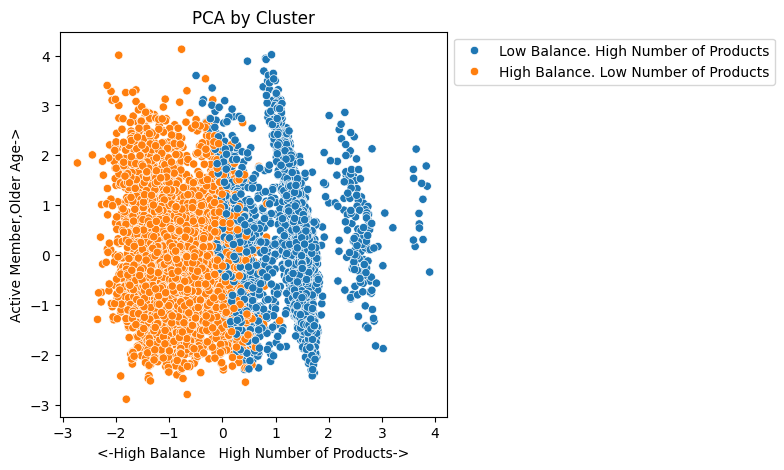

In [81]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue=df["2_clusters_labels"])
plt.xlabel("<-High Balance   High Number of Products->")
plt.ylabel("Active Member,Older Age->")
plt.title("PCA by Cluster")
plt.legend(bbox_to_anchor=(1,1))

## n_clusters=3

In [82]:
kmeans3=KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans3.fit(data_round2)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [83]:
from collections import Counter
Counter(kmeans3.labels_)

Counter({np.int32(1): 4096, np.int32(2): 2964, np.int32(0): 2940})

Text(0.5, 1.0, '3 Clusters Centers Heatmap')

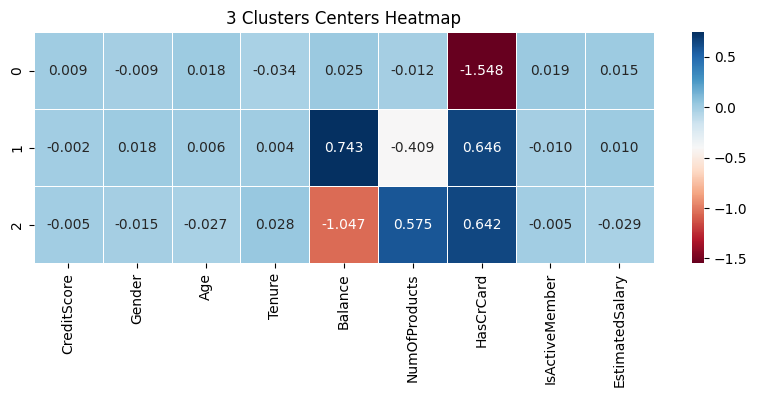

In [84]:
cluster_centers3=pd.DataFrame(kmeans3.cluster_centers_,columns=data_round2.columns)
cluster_centers3
plt.figure(figsize=(10,3))
sns.heatmap(cluster_centers3,annot=True,cmap="RdBu",fmt="0.3f",linewidth=0.5)
plt.title("3 Clusters Centers Heatmap")

Cluster Interpretation
* Cluster 0: Less Credit Card;
* Cluster 1: High Balance. More credit cards. Low Number Of Products.
* Cluster 2: Low Balance. More Credit Cards. High Number Of Products. 

In [85]:
df["3_clusters"]=pd.DataFrame(kmeans3.labels_)
df["3_clusters_labels"]=df["3_clusters"].map({0:"Less Credit Card",1:"High Balance. More Credits. Low Number of Products",2:"Low Balance. More Credit Cards. High Number of Products"})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,2_clusters,2_clusters_labels,3_clusters,3_clusters_labels
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,Low Balance. High Number of Products,2,Low Balance. More Credit Cards. High Number of...
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,High Balance. Low Number of Products,0,Less Credit Card
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,Low Balance. High Number of Products,1,High Balance. More Credits. Low Number of Prod...
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,Low Balance. High Number of Products,0,Less Credit Card
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,High Balance. Low Number of Products,1,High Balance. More Credits. Low Number of Prod...


#### PCA Visualization

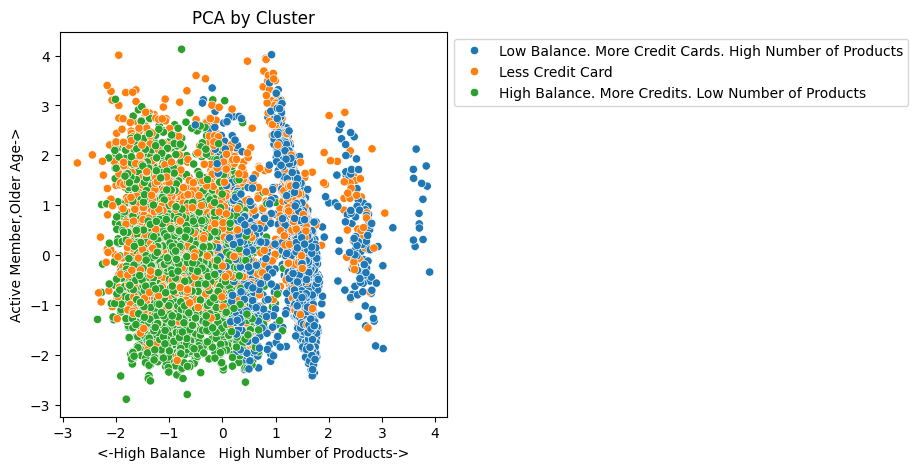

In [86]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue=df["3_clusters_labels"])
plt.xlabel("<-High Balance   High Number of Products->")
plt.ylabel("Active Member,Older Age->")
plt.title("PCA by Cluster")
plt.legend(bbox_to_anchor=(1,1))

#### n_cluster=6

In [87]:
kmeans6=KMeans(n_clusters=6,n_init=10,random_state=42)
kmeans6.fit(data_round2)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [88]:
from collections import Counter
Counter(kmeans6.labels_)

Counter({np.int32(4): 2399,
         np.int32(0): 2002,
         np.int32(1): 1989,
         np.int32(5): 1593,
         np.int32(2): 1181,
         np.int32(3): 836})

Text(0.5, 1.0, '6 Clusters Centers Heatmap')

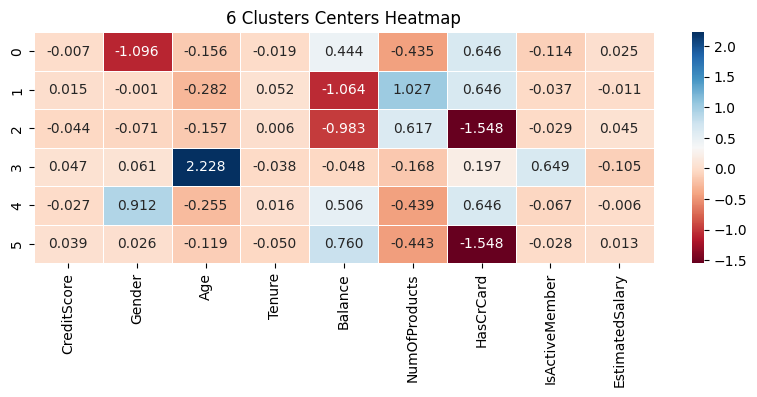

In [89]:
cluster_centers6=pd.DataFrame(kmeans6.cluster_centers_,columns=data_round2.columns)
cluster_centers6
plt.figure(figsize=(10,3))
sns.heatmap(cluster_centers6,annot=True,cmap="RdBu",fmt="0.3f",linewidth=0.5)
plt.title("6 Clusters Centers Heatmap")

#### Cluster Analysis

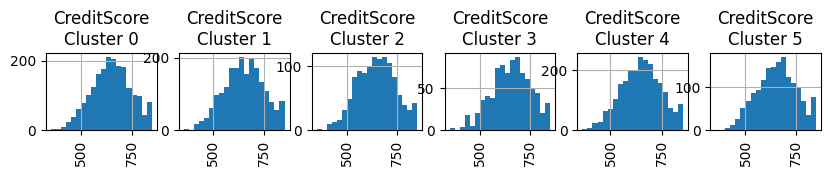

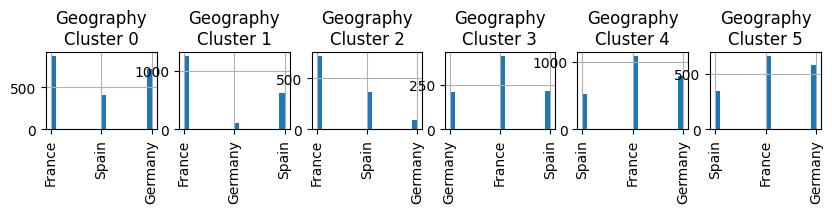

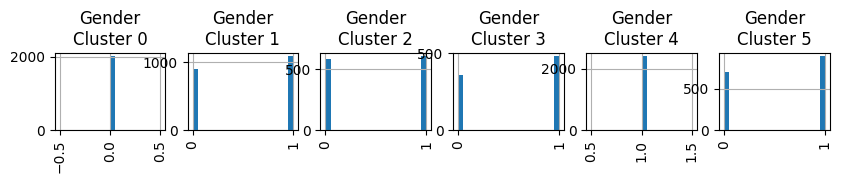

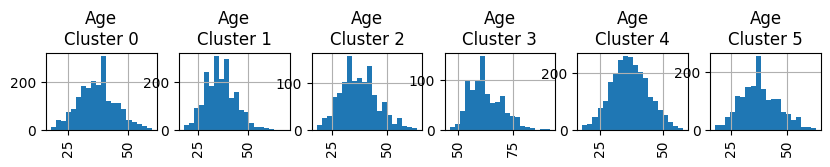

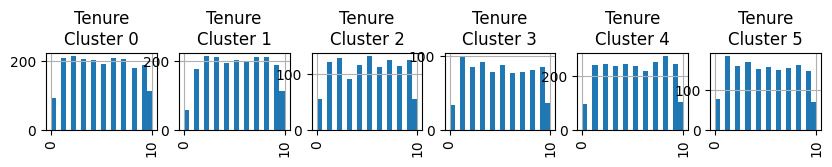

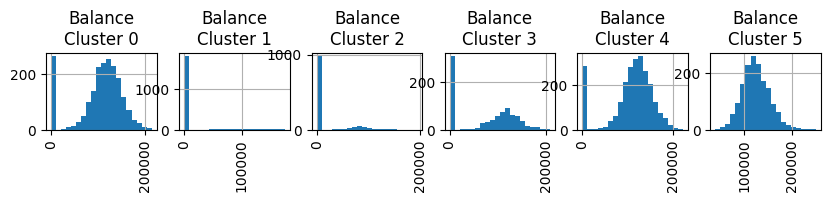

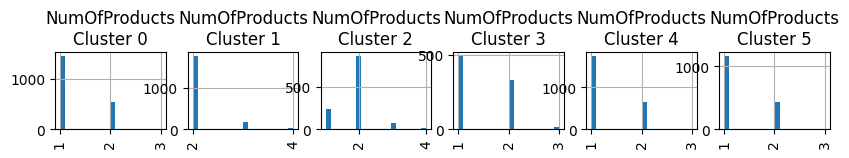

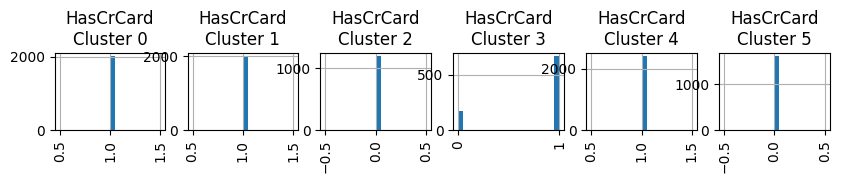

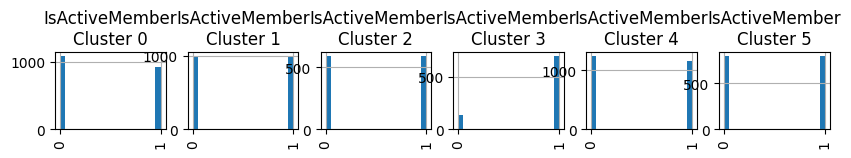

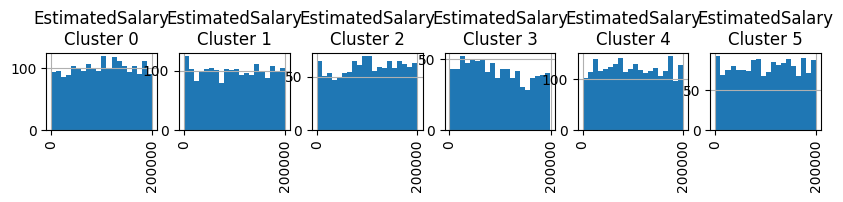

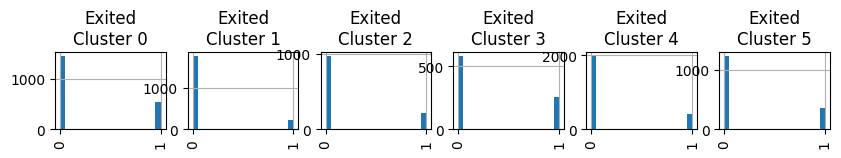

In [122]:
cluster6=pd.concat([df.loc[:,:"Exited"],df[["6_clusters","6_clusters_labels"]]],axis=1)

for col in cluster6[["CreditScore",'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',"Exited"]].columns:
    plt.figure(figsize=(10,1))
    for i in range(0,6):
        plt.subplot(1,6,i+1)
        cluster=cluster6[cluster6["6_clusters"]==i]
        cluster[col].hist(bins=20)
        plt.xticks(rotation=90)
        plt.title(f"{col}\nCluster {i}")
plt.show()        

## Observation
* CreditScores are randomly distributed among all the clusters.
* Clients of cluster 1 are mainly from France and Germany.
* Cluster 0 are all female and cluster 1 are all male
* Cluster 3 are the oldest clients.

**Cluster Interpretation**
* Cluster 0: Female. Low Number of Products. More Credit Cards.
* Cluster 1: Low Balance. High Number of Products. More Credit Cards.
* Cluster 2: Low Balance. Low Cradit cards.
* Cluster 3: Older People. Lots of Active Members.
* Cluster 4: Males. Low number of products. More credit cards.
* Cluster 5: High Balance. Low Number of products. Less Credit Cards.

In [123]:
df["6_clusters"]=pd.DataFrame(kmeans6.labels_)
df["6_clusters_labels"]=df["6_clusters"].map({0:"0 Female. Low Number of Products. All Credit Cards.",
                                              1:"1 Low Balance. High Number of Products. All Credit Cards.",
                                              2:"2 Low Balance. Low Cradit cards.",
                                              3:"3 Older People. All Active Members.",
                                             4:"4 Males. Low number of products. All Credit Cards.",
                                             5:"5 High Balance. Low Number of products. No Credit Cards."})


#### PCA Visualization

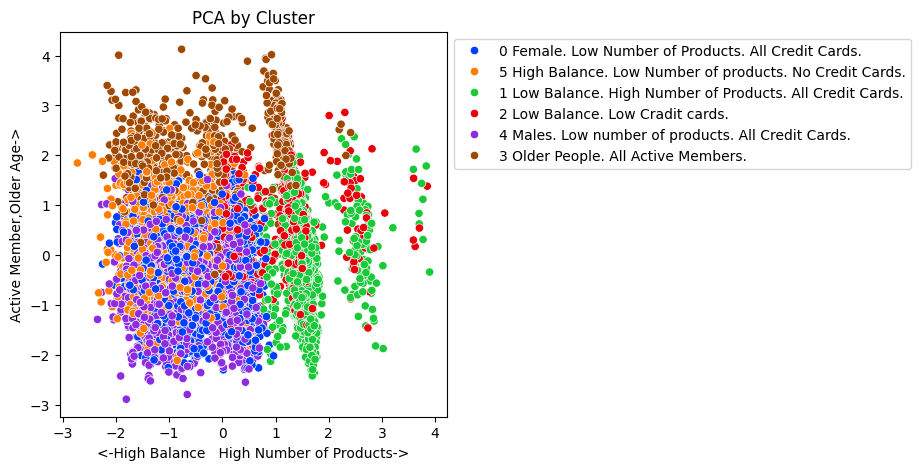

In [91]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue=df["6_clusters_labels"],palette="bright")
plt.xlabel("<-High Balance   High Number of Products->")
plt.ylabel("Active Member,Older Age->")
plt.title("PCA by Cluster")
plt.legend(bbox_to_anchor=(1,1))

#### Conclusion

**Make it a six cluster group makes more sense. Each group doesn't overlap.**

#### DEA of the 6 cluster group

In [92]:
df.groupby(["6_clusters_labels"])[["Gender","Balance","Age","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]].mean()

,Gender,Balance,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6_clusters_labels,,,,,,,,
0 Female. Low Number of Products. All Credit Cards.,0.000000,104192.341399,37.278721,1.276723,1.000000,0.458541,101549.839341,0.274725
1 Low Balance. High Number of Products. All Credit Cards.,0.545500,10119.611966,35.959779,2.127702,1.000000,0.496732,99450.620754,0.118653
2 Low Balance. Low Cradit cards.,0.510584,15165.194682,37.270957,1.889077,0.000000,0.500423,102695.646698,0.179509
3 Older People. All Active Members.,0.574163,73573.724127,62.284689,1.433014,0.795455,0.838517,94043.954689,0.305024
4 Males. Low number of products. All Credit Cards.,1.000000,108084.185390,36.250521,1.274698,1.000000,0.481451,99736.284085,0.175073
5 High Balance. Low Number of products. No Credit Cards.,0.558694,123933.602109,37.671061,1.272442,0.000000,0.500942,100829.055480,0.228500


Observation
* Group 1 has low balance and low earnings. Their account should be monitored for solvency.
* Group 2 has low earning but high balance. Bank should help them save.

#### Recommendations

* **Group 0. Female. Low Number of Products. All Credit Cards**: High Attrition with high balances. Recommend them more financial products.
* **Group 1. Low Balance. High Number of Products. All Credit Cards**	: Low Attrition rate. Monitor their balance make sure they ae not running out of their cash.
* **Group 2. Low Balance. Low Cradit cards.**: Low attrition rate. High earners. Sign them up for credit cards and more financial products to help them save.
* **Group 3. Older People. All Active Members**: Highest Attritions. It makes sense since there are lots of seniors. Wish them a good retirement
* **Group 4. Males. Low number of products. All Credit Cards**: Low attritions. Recommend more financial products.
* **Group 5. High Balance. Low Number of products. No Credit Cards.**: High Attritions. Make an appointment. Recommend credit cards and more financial products.

## Part 4 Conclusion